In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\State_District_wise.csv")

In [89]:
df.head(5)

,State,District,Confirmed,Recovered,Deceased,Zone,Age Bracket,Transmission Type,Population Density,Transmission rate,Deceased Rate
0,Andhra Pradesh,Anantapur,67374,66641,597,1,2,1,191,0,2
1,Andhra Pradesh,Chittoor,86248,85087,842,0,2,1,191,0,3
2,Andhra Pradesh,East Godavari,123755,122747,636,1,2,1,191,0,2
3,Andhra Pradesh,Guntur,74830,73659,665,0,2,1,191,0,2
4,Andhra Pradesh,Krishna,47871,46670,666,0,2,1,191,1,2


In [73]:
data=df.iloc[:,2:]
data

,Confirmed,Recovered,Deceased,Zone,Age Bracket,Transmission Type,Population Density,Transmission rate,Deceased Rate
0,67374,66641,597,1,2,1,191,0,2
1,86248,85087,842,0,2,1,191,0,3
2,123755,122747,636,1,2,1,191,0,2
3,74830,73659,665,0,2,1,191,0,2
4,47871,46670,666,0,2,1,191,1,2
...,...,...,...,...,...,...,...,...,...
292,3874,3711,33,0,1,1,16,2,0
293,3427,3333,28,2,1,1,6,2,0
294,1461,1383,26,1,1,1,10,2,0
295,3512,3426,29,1,2,1,20,2,0


## Transforming Data using MinMaxScaler

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [75]:
data=pd.DataFrame(data)
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

## Dimensionality Reduction using Principal Component Analysis (PCA)

In [76]:
from sklearn.decomposition import PCA as sklearnPCA
sklrn_pca = sklearnPCA(n_components=2)
Y_sklrn = sklrn_pca.fit_transform(data)
Y_sklrn=pd.DataFrame(Y_sklrn)

## Elbow method to select best cluster value

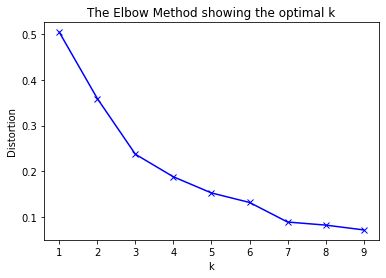

In [77]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Y_sklrn)
    kmeanModel.fit(Y_sklrn)
    distortions.append(sum(np.min(cdist(Y_sklrn, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Y_sklrn.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### k=4,5,6 can be selected as k values for cluster formation

## Cluster (for k=4)

In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(data)

In [79]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 3, 2,
       2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 3, 2, 3, 2, 2, 3,
       3, 0, 0, 2, 2, 0, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 3, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3,
       2, 2, 1, 2, 1, 1, 0, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2,
       3, 1, 2, 3, 2, 3, 3, 2, 1, 2, 3, 1, 1, 2, 3, 0, 3, 0, 3, 3, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 0, 1, 1, 0,
       1, 1, 0, 3, 0, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 1, 0, 1, 1, 3, 3, 3,
       2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2])

In [80]:
predictions = kmeans.labels_
predictions=pd.DataFrame(predictions)

In [81]:
Y_sklrn['Clusters'] = predictions

## Visualization 

Text(0.5, 1.0, 'PCA')

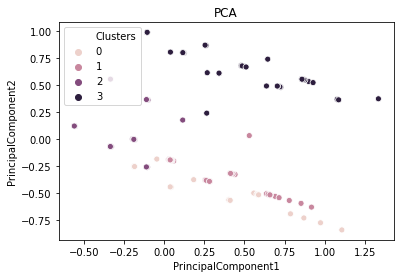

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=Y_sklrn,x=Y_sklrn[0],y=Y_sklrn[1],hue='Clusters')
plt.xlabel("PrincipalComponent1")
plt.ylabel("PrincipalComponent2")
plt.title("PCA")

In [83]:
df_4=pd.concat([df,predictions],axis=1)

In [84]:
df_4.columns

Index([             'State',           'District',          'Confirmed',
                'Recovered',           'Deceased',               'Zone',
              'Age Bracket',  'Transmission Type', 'Population Density',
        'Transmission rate',      'Deceased Rate',                    0],
      dtype='object')

In [85]:
df_4.columns=['State',           'District',          'Confirmed',
                'Recovered',           'Deceased',               'Zone',
              'Age Bracket',  'Transmission Type', 'Population Density',
        'Transmission rate',      'Deceased Rate',                    'Predictions']

In [86]:
df_4['Predictions'].value_counts()

2    144
1     79
3     54
0     20
Name: Predictions, dtype: int64

In [87]:
df_4.head(5)

,State,District,Confirmed,Recovered,Deceased,Zone,Age Bracket,Transmission Type,Population Density,Transmission rate,Deceased Rate,Predictions
0,Andhra Pradesh,Anantapur,67374,66641,597,1,2,1,191,0,2,1
1,Andhra Pradesh,Chittoor,86248,85087,842,0,2,1,191,0,3,1
2,Andhra Pradesh,East Godavari,123755,122747,636,1,2,1,191,0,2,1
3,Andhra Pradesh,Guntur,74830,73659,665,0,2,1,191,0,2,1
4,Andhra Pradesh,Krishna,47871,46670,666,0,2,1,191,1,2,1


C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


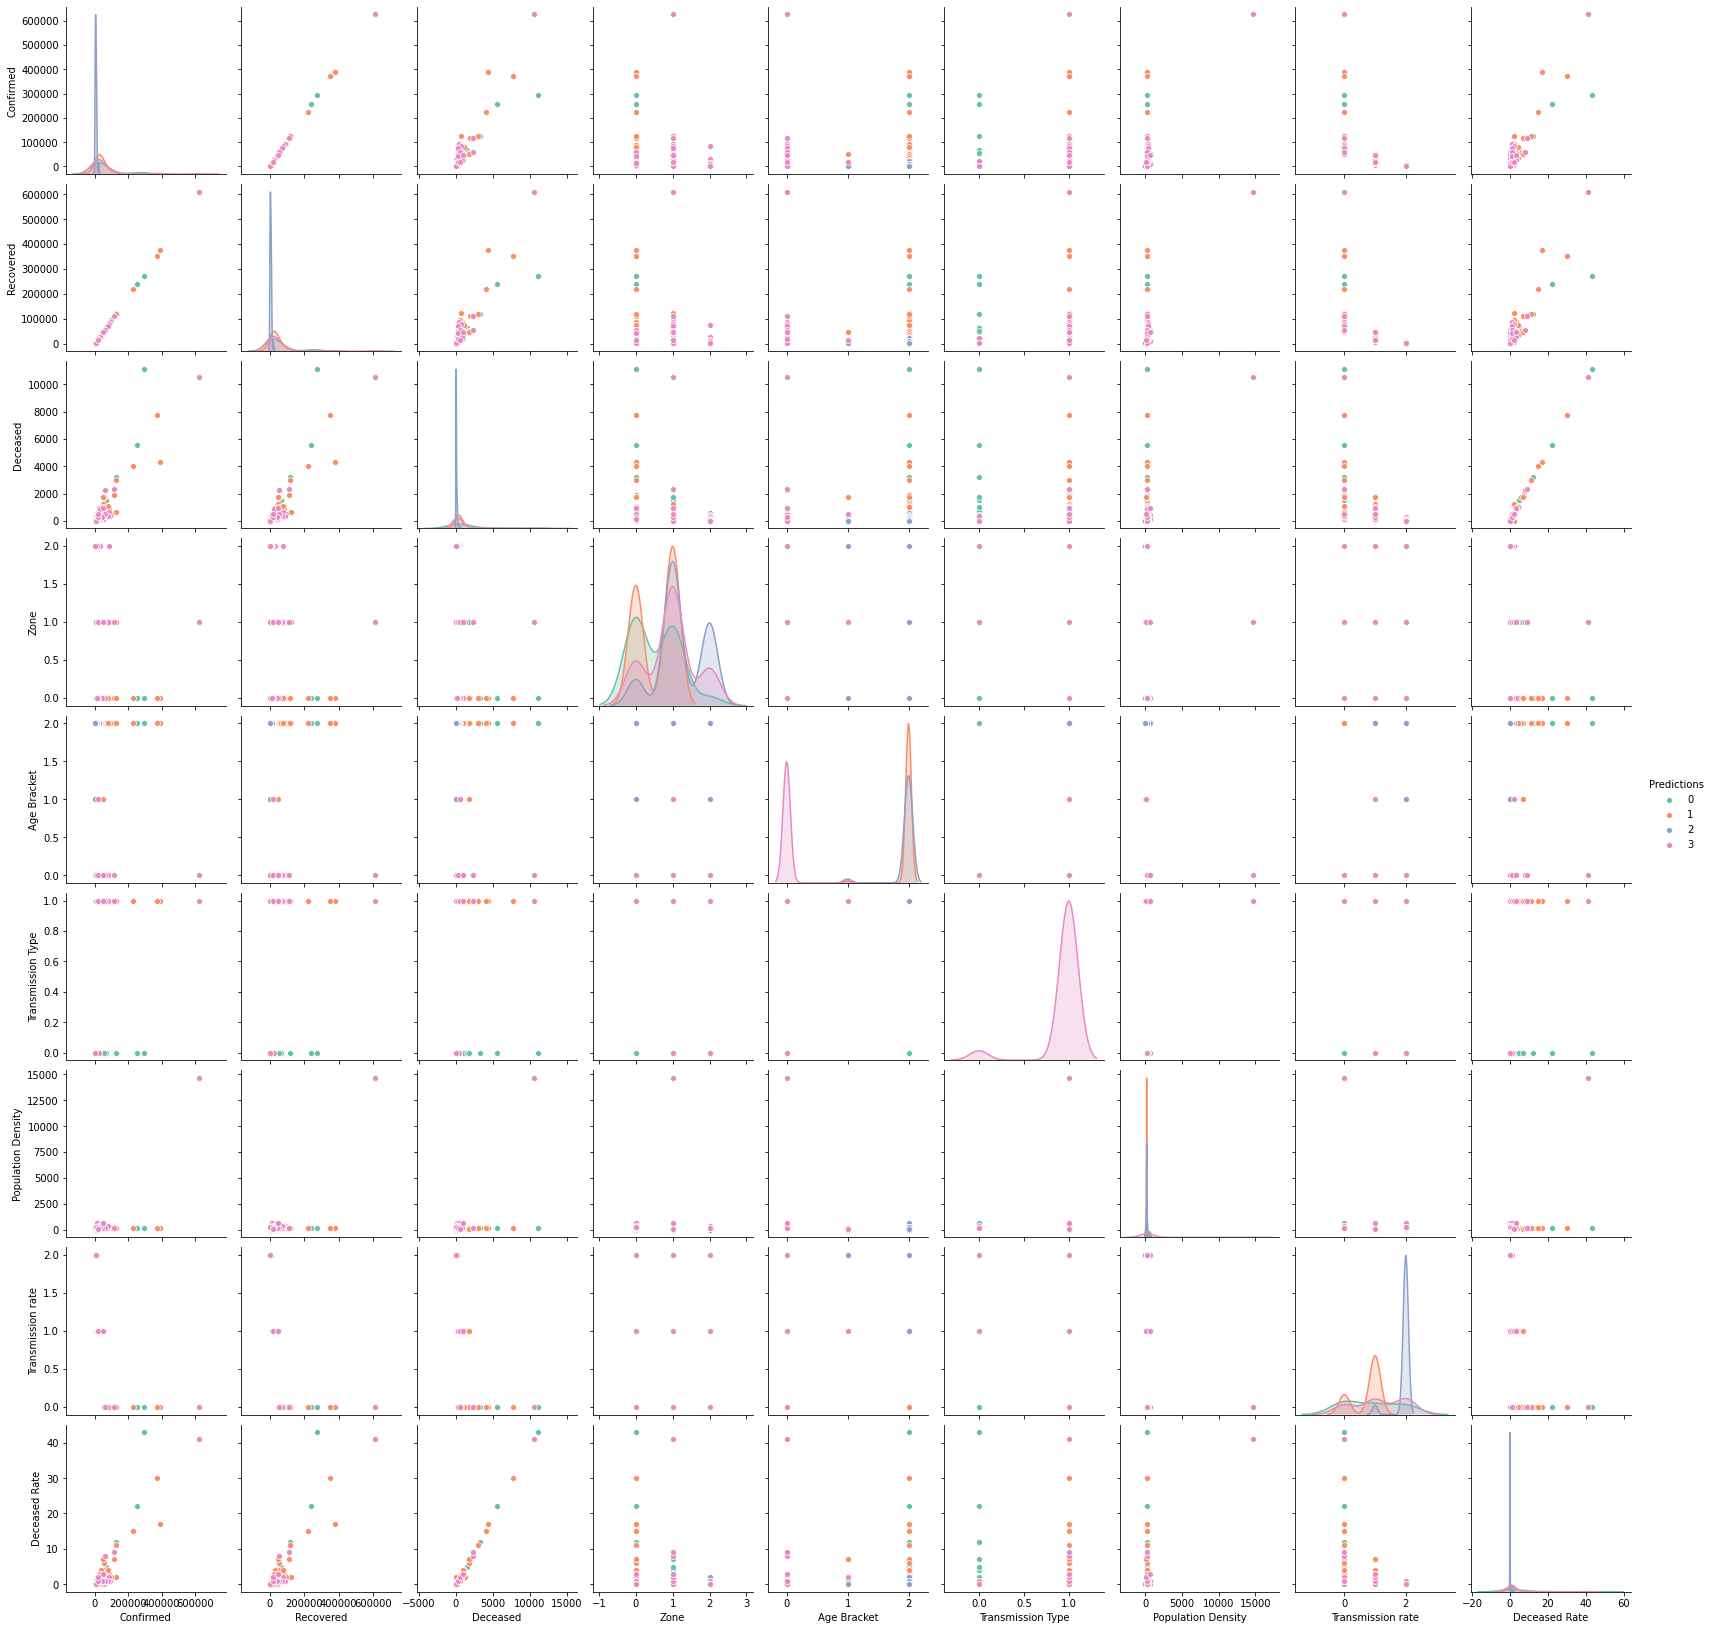

In [88]:
import seaborn as sns
g = sns.pairplot(df_4, hue="Predictions", palette="Set2", diag_kind="kde", height=2.5)

## Saving dataset with Cluster Value for each Row

In [ ]:
df.to_csv(r'C:\Users\ASUS\Desktop\clustersequals4.csv', index=False) 

In [ ]:
## Similarly we will make k=5 Clusters valued dataset by replacing 'K' Value 